In [1]:
from helpers import mnist

In [2]:
X_train, y_train, X_test, y_test = mnist.read_dataset()

Found and verified datasets/mnist/train-images-idx3-ubyte.gz
Found and verified datasets/mnist/train-labels-idx1-ubyte.gz
Found and verified datasets/mnist/t10k-images-idx3-ubyte.gz
Found and verified datasets/mnist/t10k-labels-idx1-ubyte.gz
Extracting datasets/mnist/train-images-idx3-ubyte.gz.
Extracting datasets/mnist/train-labels-idx1-ubyte.gz.
Extracting datasets/mnist/t10k-images-idx3-ubyte.gz.
Extracting datasets/mnist/t10k-labels-idx1-ubyte.gz.


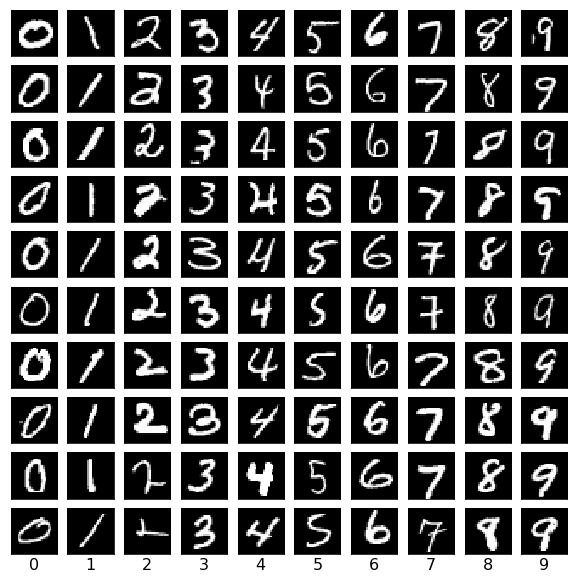

In [3]:
# Plot the original MNIST data
mnist.plot_samples(X_train, y_train)

In [4]:
X_train = X_train / 255
X_test = X_test / 255

# Binary Classification - The '0' Classifier

**We are going to make a '0' classifier before building a multi-label classifier that can classify all the digits from 0 to 9.**
MNIST labels record `0` for an image of the digit zero, `1` for an image of the digit one, `2` for an image of the digit two, and so on. Our '0' classifier cares only about the image of the digit zero. So, we shall relabel the labels so as it says `1` for an image of the digit zero and `0` otherwise.

In [5]:
import numpy as np

y_train_new = np.zeros(y_train.shape)
y_test_new = np.zeros(y_test.shape)

y_train_new[np.where(y_train == 0)[0]] = 1
y_test_new[np.where(y_test == 0)[0]] = 1

In [6]:
# Shape of current training and test sets
print(X_train.shape, y_train_new.shape)
print(X_test.shape, y_test_new.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [7]:
# Transform the data for ease of matrix multiplication
X_train, X_test = X_train.T, X_test.T
y_train_new, y_test_new = y_train_new.reshape(1, y_train_new.shape[0]), y_test_new.reshape(1, y_test_new.shape[0])

print(X_train.shape, y_train_new.shape)
print(X_test.shape, y_test_new.shape)

(784, 60000) (1, 60000)
(784, 10000) (1, 10000)


In [8]:
# Shuffle the training and test sets
np.random.seed(1338)

shuffle_idxs_train = np.random.permutation(X_train.shape[1])
shuffle_idxs_test = np.random.permutation(X_test.shape[1])

X_train, y_train_new = X_train[:, shuffle_idxs_train], y_train_new[:, shuffle_idxs_train]
X_test, y_test_new = X_test[:, shuffle_idxs_test], y_test_new[:, shuffle_idxs_test]

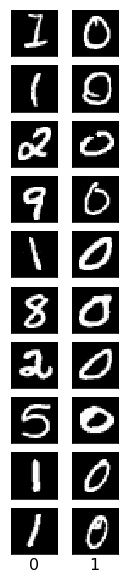

In [9]:
# Plot and check if the labeling is ok
mnist.plot_samples(X_train.T, y_train_new[0], num_classes=2)

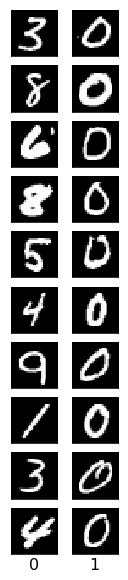

In [10]:
# Doing the same for the test set
mnist.plot_samples(X_test.T, y_test_new[0], num_classes=2)

## A Single Neuron / Logistic Regression

Our goal is to build a feed forward neural network with 784 inputs (28 x 28), and a single sigmoid unit generating the output.

In [11]:
# The sigmoid function
def sigmoid(z):
    return 1 / (1+np.exp(-z))

In [12]:
# The cross entropy loss
def compute_cross_entropy_loss(Y, Y_hat):
    m = Y.shape[1] # number of samples
    
    L = -(1./m) * (np.sum(np.multiply(np.log(Y_hat), Y)) + np.sum(np.multiply(np.log(1-Y_hat), (1-Y))))
    
    return L

In [13]:
learning_rate = 1

X = X_train
Y = y_train_new

dims_x = X.shape[0]
m = X.shape[1]

W = np.random.randn(dims_x, 1) * 0.01
b = np.zeros((1, 1))

In [14]:
print(W.shape, b.shape)

(784, 1) (1, 1)


In [15]:
epochs = 2000

for i in np.arange(epochs):
    Z = np.matmul(W.T, X) + b
    A = sigmoid(Z) # activations
    
    cost = compute_cross_entropy_loss(Y, A)
    
    dW = (1/m) * np.matmul(X, (A-Y).T)
    db = (1/m) * np.sum(A-Y, axis=1, keepdims=True)
    
    W = W - learning_rate * dW
    b = b - learning_rate * db
    
    if (i % 100 == 0):
        print('Epoch {}, cost {}'.format(i, cost))

print('Final cost ', cost)

Epoch 0, cost 0.6995007618981587
Epoch 100, cost 0.041195223945820786
Epoch 200, cost 0.03573182673501398
Epoch 300, cost 0.03319088710307719
Epoch 400, cost 0.031602148999895656
Epoch 500, cost 0.030469478343543546
Epoch 600, cost 0.029601984062031794
Epoch 700, cost 0.0289075006520541
Epoch 800, cost 0.02833458066769306
Epoch 900, cost 0.027851505398103122
Epoch 1000, cost 0.027437287817419127
Epoch 1100, cost 0.027077303888196964
Epoch 1200, cost 0.026760957269098853
Epoch 1300, cost 0.026480332971716345
Epoch 1400, cost 0.026229373163534186
Epoch 1500, cost 0.026003347786275673
Epoch 1600, cost 0.025798501052480455
Epoch 1700, cost 0.025611807731139333
Epoch 1800, cost 0.025440800591684135
Epoch 1900, cost 0.025283445442454384
Final cost  0.025139448499387807


In [21]:
from sklearn.metrics import classification_report, confusion_matrix

Z = np.matmul(W.T, X_test) + b
A = sigmoid(Z)

In [22]:
predictions = (A>.5)[0,:]
labels = (y_test_new == 1)[0,:]

In [23]:
print(confusion_matrix(predictions, labels))

[[8978   34]
 [  42  946]]


In [24]:
print(classification_report(predictions, labels))

             precision    recall  f1-score   support

      False       1.00      1.00      1.00      9012
       True       0.97      0.96      0.96       988

avg / total       0.99      0.99      0.99     10000

